**Predicting Artist Gender Using Artwork Size: Exploring Gender Discrimination in the Artistic Profession**

DSCI 100 004 Group Project Report

Group 28

**Anneke Dresselhuis** - 60524006 | **Hesham El Kassem** - 37765682 | **Ariane Huang** - 94730660 | **Elaine Zhou** - 99976417

**Introduction** 

Historical and contemporary artists have made and continue to make artwork using a variety of media including painting, drawing, sculpture, photography, printmaking among others. Throughout history, however, socio-economic inequalties have made it difficult for women-identifying artists to work with certain types of media - particularly those which require a significant amount of space (Bain, 2006) which can be costly. Given that women's artwork has historically taken smaller forms and has been categorized as less significant "arts and crafts" rather than grand masterpieces or "valuable art" made by men (Thomas, 2020), women artists have experienced and continue to experience disproportionate financial hardships in their creative practices. A recent art exhibition at Vancouver's Contemporary Art Gallery titled, "The Artist's Studio is Her Bedroom" alludes to the reality of spatial and financial constraints faced by many women artists today (Contemporary Art Gallery, 2020). 

Our analysis uses data from New York's Museum of Modern Art (MoMA) and will seek to answer the following question: **given the size of an artwork, what will be the gender of the artist?** This expansive dataset contains metadata on each artwork in MoMA's permanant collection; in this analysis we will be using the variables: "Gender" (denoting whether the artist is male or female), "Height" (measuring the artwork height in centimeters) and "Width" (measuring the artwork width in centimeters).

We note that gender in this dataset is constrained to a binary class, although in real life gender is best understood as a existing on a spectrum. Currently, little emperical attention has been given to documenting discrimination in the artistic profession. The results from this analysis could be used to inform public funding iniatives that support women artists' access to studio space, improve their ability to create larger works and ultimately strengthen their financial security. 

**Sources:**

Bain, A. L. (2004). Female artistic identity in place: The studio. Social & Cultural Geography, 5(2), 171–193. https://doi.org/10.1080/14649360410001690204

The Artist’s Studio is Her Bedroom. (2020). Contemporary Art Gallery, Vancouver. Retrieved November 8, 2021, from https://www.contemporaryartgallery.ca/exhibitions/the-artists-studio-is-her-bedroom/

Thomas, Z. (2020). Introduction: The Arts and Crafts movement, work cultures, and the politics of gender. In Women art workers and the Arts and Crafts movement (1st ed., pp. 1–32). Manchester University Press. https://www.jstor.org/stable/j.ctv11g95mh.5

The Museum of Modern Art. (2021). The Museum of Modern Art (MoMA) Collection (Version v1.62) [Data set]. https://doi.org/10.5281/zenodo.4408594

**Preliminary Exploratory Data Anlaysis** 

First of all we loaded the libraries we need for the project.

In [1]:
library(tidyverse)
library(lubridate)
library(repr)
library(tidymodels)
library(GGally)
set.seed(1234) # to allow for reproducibility 

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9   

We read the data from https://media.githubusercontent.com/media/MuseumofModernArt/collection/master/Artworks.csv" using `read_csv` function as the columns of the dataset is seperated by commas. 


In [2]:
#load dataset
artworks <- read_csv("https://media.githubusercontent.com/media/MuseumofModernArt/collection/master/Artworks.csv")

#explore a subset of the data: last 6 entries
artworks_6 <- tail(artworks, 6)
artworks_6

Parsed with column specification:
cols(
  .default = col_character(),
  DateAcquired = col_date(format = ""),
  ObjectID = col_double(),
  `Circumference (cm)` = col_logical(),
  `Depth (cm)` = col_double(),
  `Diameter (cm)` = col_double(),
  `Height (cm)` = col_double(),
  `Length (cm)` = col_logical(),
  `Weight (kg)` = col_double(),
  `Width (cm)` = col_double(),
  `Seat Height (cm)` = col_logical(),
  `Duration (sec.)` = col_logical()
)

See spec(...) for full column specifications.

Warning message:
“2892 parsing failures.
 row         col           expected actual                                                                                         file
1002 Length (cm) 1/0/T/F/TRUE/FALSE  17.8  'https://media.githubusercontent.com/media/MuseumofModernArt/collection/master/Artworks.csv'
1003 Length (cm) 1/0/T/F/TRUE/FALSE  19.0  'https://media.githubusercontent.com/media/MuseumofModernArt/collection/master/Artworks.csv'
1004 Length (cm) 1/0/T/F/TRUE/FALSE  18.1  'https://media

Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,⋯,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<lgl>,<lgl>
"Silver Springs, FL",Unknown photographer,8595,NA,(),(0),(0),(),February 1903,Gelatin silver print,⋯,http://www.moma.org/media/W1siZiIsIjQ5MjcyMCJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2UiXV0.jpg?sha=8198120224d3f8dd,NA,NA,NA,8.80000,NA,NA,30.00000,NA,NA
Untitled,"Chesnutt Brothers Studio, Andrew Chesnutt, Lewis Chesnutt","133005, 133006, 133007","(American, 1861–1934) (American, 1860–1933)",() (American) (American),(0) (1861) (1860),(0) (1934) (1933),() (Male) (Male),c. 1890,Gelatin silver print,⋯,http://www.moma.org/media/W1siZiIsIjQ5MjcyMiJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2UiXV0.jpg?sha=868071c597640056,NA,NA,NA,10.79502,NA,NA,16.51003,NA,NA
Plate (folio 2 verso) from Muscheln und schirme (Shells and Umbrellas),Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",(Swiss),(1889),(1943),(Female),1939,One from an illustrated book with four line block reproductions,⋯,http://www.moma.org/media/W1siZiIsIjQ4NTExNSJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2UiXV0.jpg?sha=0850c50841bddd28,NA,NA,NA,13.50000,NA,NA,10.00000,NA,NA
Plate (folio 6) from Muscheln und schirme (Shells and Umbrellas),Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",(Swiss),(1889),(1943),(Female),1939,One from an illustrated book with four line block reproductions,⋯,http://www.moma.org/media/W1siZiIsIjQ4NTExOCJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2UiXV0.jpg?sha=70e2d5d8543da2a6,NA,NA,NA,13.50000,NA,NA,10.00000,NA,NA
Plate (folio 12) from Muscheln und schirme (Shells and Umbrellas),Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",(Swiss),(1889),(1943),(Female),1939,One from an illustrated book with four line block reproductions,⋯,http://www.moma.org/media/W1siZiIsIjQ4NTEyMCJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2UiXV0.jpg?sha=72d94323cdc79256,NA,NA,NA,11.00000,NA,NA,10.00000,NA,NA
Plate (folio 16) from Muscheln und schirme (Shells and Umbrellas),Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",(Swiss),(1889),(1943),(Female),1939,One from an illustrated book with four line block reproductions,⋯,http://www.moma.org/media/W1siZiIsIjQ4NTEyMSJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2UiXV0.jpg?sha=6fed2330b797a1b8,NA,NA,NA,13.50000,NA,NA,10.00000,NA,NA


Here we tidy the column names in order to avoid the risk of the column Height (cm) being considered as a function "Height" with argument "cm" in R. By renaming the column names using make.names function we are able to use them directly.

In [3]:
#tidy column names
colnames(artworks) <- make.names(colnames(artworks), unique = TRUE)
artworks_6 <- tail(artworks, 6)
artworks_6

Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,⋯,ThumbnailURL,Circumference..cm.,Depth..cm.,Diameter..cm.,Height..cm.,Length..cm.,Weight..kg.,Width..cm.,Seat.Height..cm.,Duration..sec..
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<lgl>,<lgl>
"Silver Springs, FL",Unknown photographer,8595,NA,(),(0),(0),(),February 1903,Gelatin silver print,⋯,http://www.moma.org/media/W1siZiIsIjQ5MjcyMCJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2UiXV0.jpg?sha=8198120224d3f8dd,NA,NA,NA,8.80000,NA,NA,30.00000,NA,NA
Untitled,"Chesnutt Brothers Studio, Andrew Chesnutt, Lewis Chesnutt","133005, 133006, 133007","(American, 1861–1934) (American, 1860–1933)",() (American) (American),(0) (1861) (1860),(0) (1934) (1933),() (Male) (Male),c. 1890,Gelatin silver print,⋯,http://www.moma.org/media/W1siZiIsIjQ5MjcyMiJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2UiXV0.jpg?sha=868071c597640056,NA,NA,NA,10.79502,NA,NA,16.51003,NA,NA
Plate (folio 2 verso) from Muscheln und schirme (Shells and Umbrellas),Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",(Swiss),(1889),(1943),(Female),1939,One from an illustrated book with four line block reproductions,⋯,http://www.moma.org/media/W1siZiIsIjQ4NTExNSJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2UiXV0.jpg?sha=0850c50841bddd28,NA,NA,NA,13.50000,NA,NA,10.00000,NA,NA
Plate (folio 6) from Muscheln und schirme (Shells and Umbrellas),Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",(Swiss),(1889),(1943),(Female),1939,One from an illustrated book with four line block reproductions,⋯,http://www.moma.org/media/W1siZiIsIjQ4NTExOCJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2UiXV0.jpg?sha=70e2d5d8543da2a6,NA,NA,NA,13.50000,NA,NA,10.00000,NA,NA
Plate (folio 12) from Muscheln und schirme (Shells and Umbrellas),Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",(Swiss),(1889),(1943),(Female),1939,One from an illustrated book with four line block reproductions,⋯,http://www.moma.org/media/W1siZiIsIjQ4NTEyMCJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2UiXV0.jpg?sha=72d94323cdc79256,NA,NA,NA,11.00000,NA,NA,10.00000,NA,NA
Plate (folio 16) from Muscheln und schirme (Shells and Umbrellas),Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",(Swiss),(1889),(1943),(Female),1939,One from an illustrated book with four line block reproductions,⋯,http://www.moma.org/media/W1siZiIsIjQ4NTEyMSJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2UiXV0.jpg?sha=6fed2330b797a1b8,NA,NA,NA,13.50000,NA,NA,10.00000,NA,NA


First we split our data into a training set and a testing set using proportions of 75% and 25% respectively so that there is enough data in both sets to build and assess our model. We will only use the training set to create our model. We will use Width and Height as the two predictors to predict the artists' gender. By using`filter(Gender == "(Male)")` and `filter(Gender == "(Female)")` we successfully separate our data into two subsets by gender. Since the data is untidy and there are currently 409 categories of genders, the best option is to filter for (Male) and (Female) since extracting every category of gender would be computationally expensive especially and where certain gender categories have few observations, we do not want a small sample size to skew our analysis. For examples, genders with 1-3 oberservations are likely to have a high predictive accuracy, but this would be unrepresentative.

In [4]:
#select relevant columns
artworks_selected <- artworks %>%
                     select(Height..cm., Width..cm., Gender)

#filter for male and female only. Remove N/As and 0s
artworks_filter <- artworks_selected %>%
                    filter(Gender == "(Male)" | Gender == "(Female)") %>%
                    filter(Height..cm. != "NA") %>%
                        filter(Width..cm. != "NA") %>%
                        filter(Width..cm. != 0) %>%
                        filter(Height..cm. != 0)
tail(artworks_filter,6)

Height..cm.,Width..cm.,Gender
<dbl>,<dbl>,<chr>
10.5,8,(Male)
10.5,8,(Male)
13.5,10,(Female)
13.5,10,(Female)
11.0,10,(Female)
13.5,10,(Female)


Below, we create a balanced and random sample of 1200 male and 1200 female artists. The original dataset at a male to femal ratio of 6:1, which would skew our analysis and over represent male artwork in the model. To mitigate that, we create an equal amount of male and female artworks.

In [5]:
#filter for (Male) 
artworks_male <- artworks_filter %>%
                 filter(Gender == "(Male)")
                
artworks_male <- sample_n(artworks_male, 1200)
artworks_male_6 <- tail(artworks_male, 6)
artworks_male_6
nrow(artworks_male)

#filter for (Female)

artworks_female <- artworks_filter %>%
                        filter(Gender == "(Female)")                        
artworks_female <- sample_n(artworks_female, size = 1200)
artworks_female_6 <- tail(artworks_female, 6)
artworks_female_6 
nrow(artworks_female)

#bring together
artworks_both <- rbind(artworks_male, artworks_female)
artworks_both <- sample_n(artworks_both, 1200) %>%
                 filter(Height..cm. != "NA") %>%
                 filter(Width..cm. != "NA") %>%
                 filter(Width..cm. != 0) %>%
                 filter(Height..cm. != 0)
artworks_both_6 <- tail(artworks_both, 6)
artworks_both_6
nrow(artworks_both)


Height..cm.,Width..cm.,Gender
<dbl>,<dbl>,<chr>
34.20000,22.20000,(Male)
24.76505,17.78004,(Male)
3.10000,3.10000,(Male)
35.56010,21.43130,(Male)
23.80000,17.70000,(Male)
29.50000,45.60000,(Male)


[1] 1200

Height..cm.,Width..cm.,Gender
<dbl>,<dbl>,<chr>
35.00000,24.50000,(Female)
42.50000,27.50000,(Female)
15.24003,22.86005,(Female)
30.48006,45.72009,(Female)
79.37516,65.40513,(Female)
25.20000,30.20000,(Female)


[1] 1200

Height..cm.,Width..cm.,Gender
<dbl>,<dbl>,<chr>
23.90000,18.60000,(Male)
40.32258,29.84506,(Female)
22.90000,34.00000,(Male)
19.10000,24.10000,(Female)
58.80000,45.60000,(Male)
1.50000,5.80000,(Female)


[1] 1200

### Exploratory Analysis 
In order to prove gender can affect sizes of artworks, we have to show differences in artworks' height and width produced by artists in different gender. We generated coloured plots using ggpairs so that it is easy to contrast and compare the differing data from the two genders.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



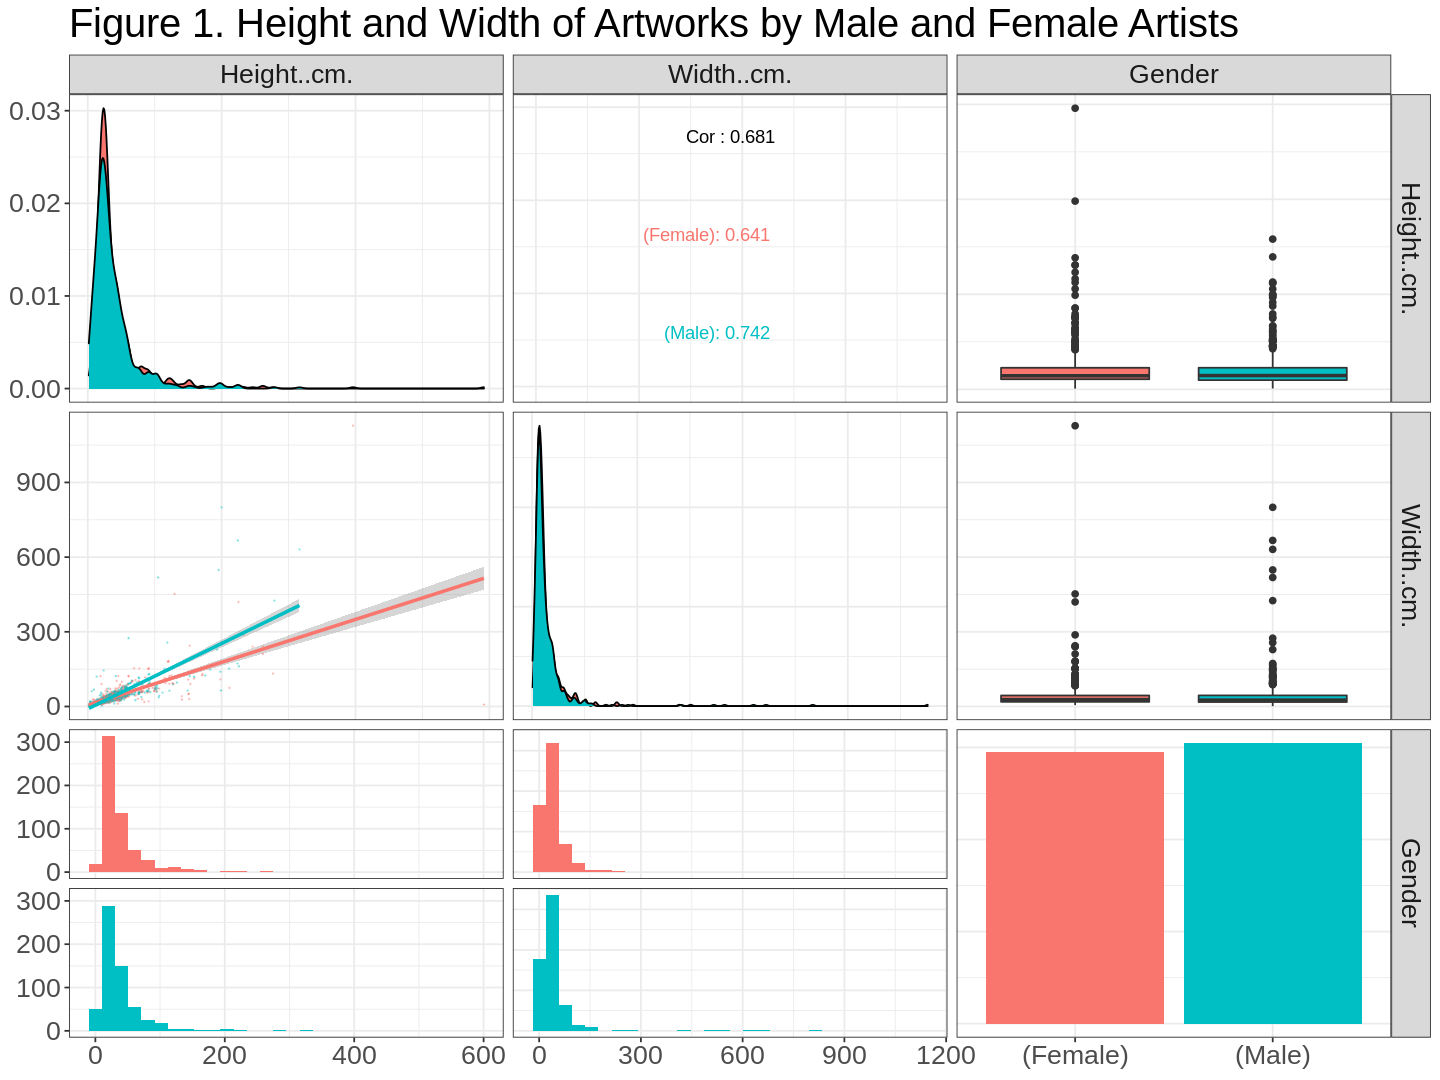

In [6]:
options(repr.plot.height = 9, repr.plot.width = 12) #to improve readability

#plot the graphs
gender_plot <- artworks_both %>%
                   ggpairs(title = "Figure 1. Height and Width of Artworks by Male and Female Artists", 
                   mapping = ggplot2::aes(colour=Gender), 
                   lower = list(continuous = wrap("smooth", alpha = 0.3, size=0.1)))  +
                   labs("Height(cm)", "Width(cm)", "Gender(Female and Male)") +
                   theme_bw() +
                   theme(text = element_text(size = 20))
gender_plot

This plot allows us to see if there are any outliers that may affect accuracy, and here we can see that there are 2 outliers for female which we will remove to improve the accuracy.

In [7]:
#remove outliers using slice()
artworks_width_revised <- arrange(artworks_both, Width..cm.) %>%
                          slice(1:(n()-1))
artworks_width_revised_6 <- tail(artworks_width_revised, 6)
artworks_width_revised_6
artworks_height_revised <- arrange(artworks_width_revised, Height..cm.) %>%
                           slice(1:(n()-1))
artworks_height_revised_6 <- tail(artworks_height_revised, 6)
artworks_height_revised_6

Height..cm.,Width..cm.,Gender
<dbl>,<dbl>,<chr>
129.5403,452.1209,(Female)
105.1000,518.2000,(Male)
195.6000,548.6000,(Male)
316.2306,631.1913,(Male)
224.1554,667.0688,(Male)
200.0254,800.1016,(Male)


Height..cm.,Width..cm.,Gender
<dbl>,<dbl>,<chr>
246.3805,240.0305,(Female)
261.5000,241.2000,(Female)
261.6205,210.8204,(Female)
276.9000,132.1000,(Female)
278.8000,425.2000,(Male)
316.2306,631.1913,(Male)


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



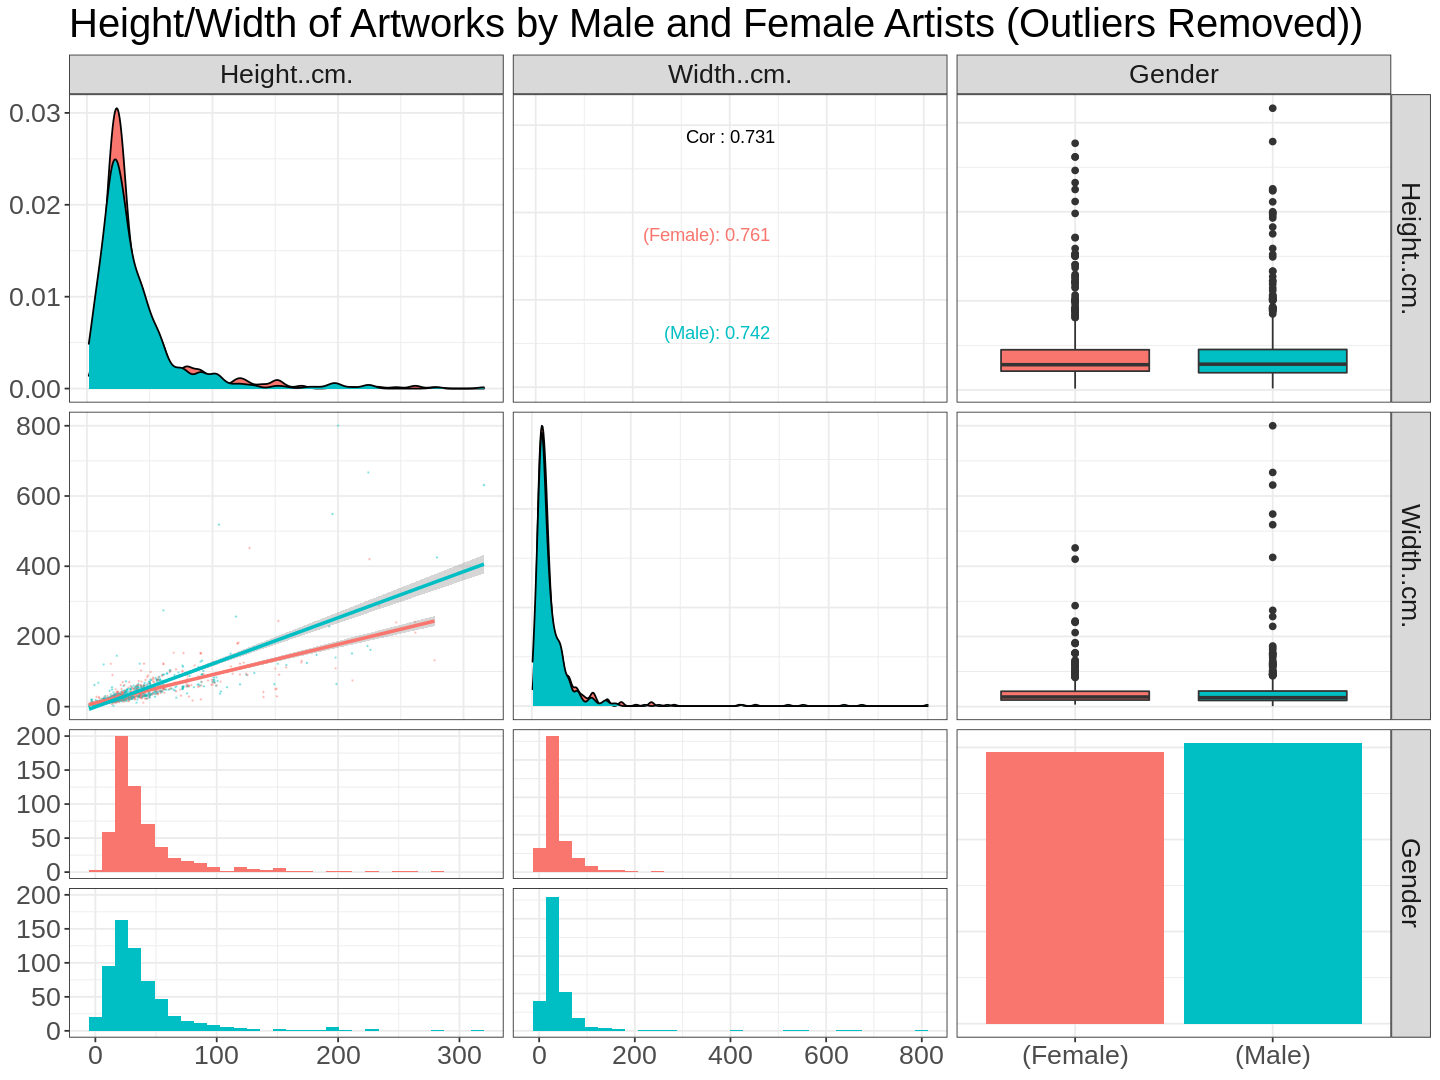

In [8]:
#make plot without outliers
options(repr.plot.height = 9, repr.plot.width = 12)
gender_plot_revised <- artworks_height_revised %>%
                   ggpairs(title = "Height/Width of Artworks by Male and Female Artists (Outliers Removed))", 
                   mapping = ggplot2::aes(colour=Gender), 
                   lower = list(continuous = wrap("smooth", alpha = 0.3, size=0.1)))  +
                   labs("Height(cm)", "Width(cm)", "Gender(Female and Male)") +
                   theme_bw() +
                   theme(text = element_text(size = 20))
gender_plot_revised

After removing outliers, the average width of artworks created by male artists are higher than that of female artists.
For the height of artworks, when the height of artpieces is small, artists in both genders have relatively similar proportion. However, for artworks with large height, their artists are tend to be female. We then proceed with knn classification (not regression because our expected result is qualitative). To do this, we need to mutate the Gender data to make it a factor.

In [9]:
#make Gender a factor
artworks_both <- artworks_both %>%
                 mutate(Gender = as_factor(Gender))

#split the data
artworks_split <- initial_split(artworks_both, prop = 0.75, strat = Gender)
artworks_training <- training(artworks_split)
artworks_testing <- testing(artworks_split)

#scale and centre the recipe

set.seed(1234)
artwork_recipe <- recipe(Gender ~ Height..cm. + Width..cm., data = artworks_both) %>%
  step_scale(all_predictors()) %>%
  step_center(all_predictors())
artwork_recipe 

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          2

Operations:

Scaling for all_predictors()
Centering for all_predictors()

### Model Building
First, we create the model using 3 neighbors, then we will tune for the best 'K' using cross validation.

In [31]:
set.seed(1234)

#create k-nearest neighbor classifier with k=3
artwork_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) %>%
  set_engine("kknn") %>%
  set_mode("classification")
artwork_spec

#fit the model
artworks_fit <- workflow() %>%
      add_recipe(artwork_recipe) %>%
      add_model(artwork_spec) %>%
      fit(data = artworks_both)
artworks_fit



K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 3
  weight_func = rectangular

Computational engine: kknn 


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = ~3, kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.4533333
Best kernel: rectangular
Best k: 3

### Testing the Model
Next, we test and assess the model when the k-nearest neighbors is 3.

In [32]:
#test the model
artworks_test_predictions <- predict(artworks_fit , artworks_testing) %>%
      bind_cols(artworks_testing)

#assessing accuracy when k=3
artworks_prediction_accuracy <- artworks_test_predictions %>%
        metrics(truth = Gender, estimate = .pred_class)    
artworks_prediction_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7625418
kap,binary,0.5251102


When K=3, the model predicts the Gender of the artist with 76.3% accuracy. 

### Cross-Validation
The next step is to tune the model using cross-validation to find the best K.

In [33]:
#create cross validation using vfold
artwork_vfold <- vfold_cv(artworks_both, v = 10, strata = Gender)


#perform workflow analysis using fit resamples
artworks_resample_fit <- workflow() %>%
  add_recipe(artwork_recipe) %>%
  add_model(artwork_spec) %>%
  fit_resamples(resamples = artwork_vfold)

#assess accuracy of the model
artworks_metrics <- collect_metrics(artworks_resample_fit)
artworks_metrics

.metric,.estimator,mean,n,std_err
<chr>,<chr>,<dbl>,<int>,<dbl>
accuracy,binary,0.5383482,10,0.01753156
roc_auc,binary,0.5610232,10,0.01723636


After collecting the metrics from the cross validation, we can see that on average, the model predicts the correct gender about 54% of the time. Next we use `tune()`, where each parameter in the model can be adjusted rather than given a specific value.

In [34]:
#create new model specification using tune() argument
set.seed(1234)
artworks_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("classification")
artworks_tune

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [38]:
#obtain the results from the new model
artworks_tune_results <- workflow() %>%
  add_recipe(artwork_recipe) %>%
  add_model(artworks_tune) %>%
  tune_grid(resamples = artwork_vfold, grid = 10) %>%
  collect_metrics()
artworks_tune_results


neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,accuracy,binary,0.5466396,10,0.01447155,Model1
2,roc_auc,binary,0.5587154,10,0.01496055,Model1
3,accuracy,binary,0.5383482,10,0.01753156,Model2
3,roc_auc,binary,0.5610232,10,0.01723636,Model2
4,accuracy,binary,0.5375149,10,0.01779592,Model3
4,roc_auc,binary,0.5741759,10,0.01686168,Model3
6,accuracy,binary,0.5583138,10,0.01442787,Model4
6,roc_auc,binary,0.5605108,10,0.01606382,Model4
8,accuracy,binary,0.5399870,10,0.01316953,Model5


Next, we create a plot of all the Ks and their respective accuracies to find the best value for K.

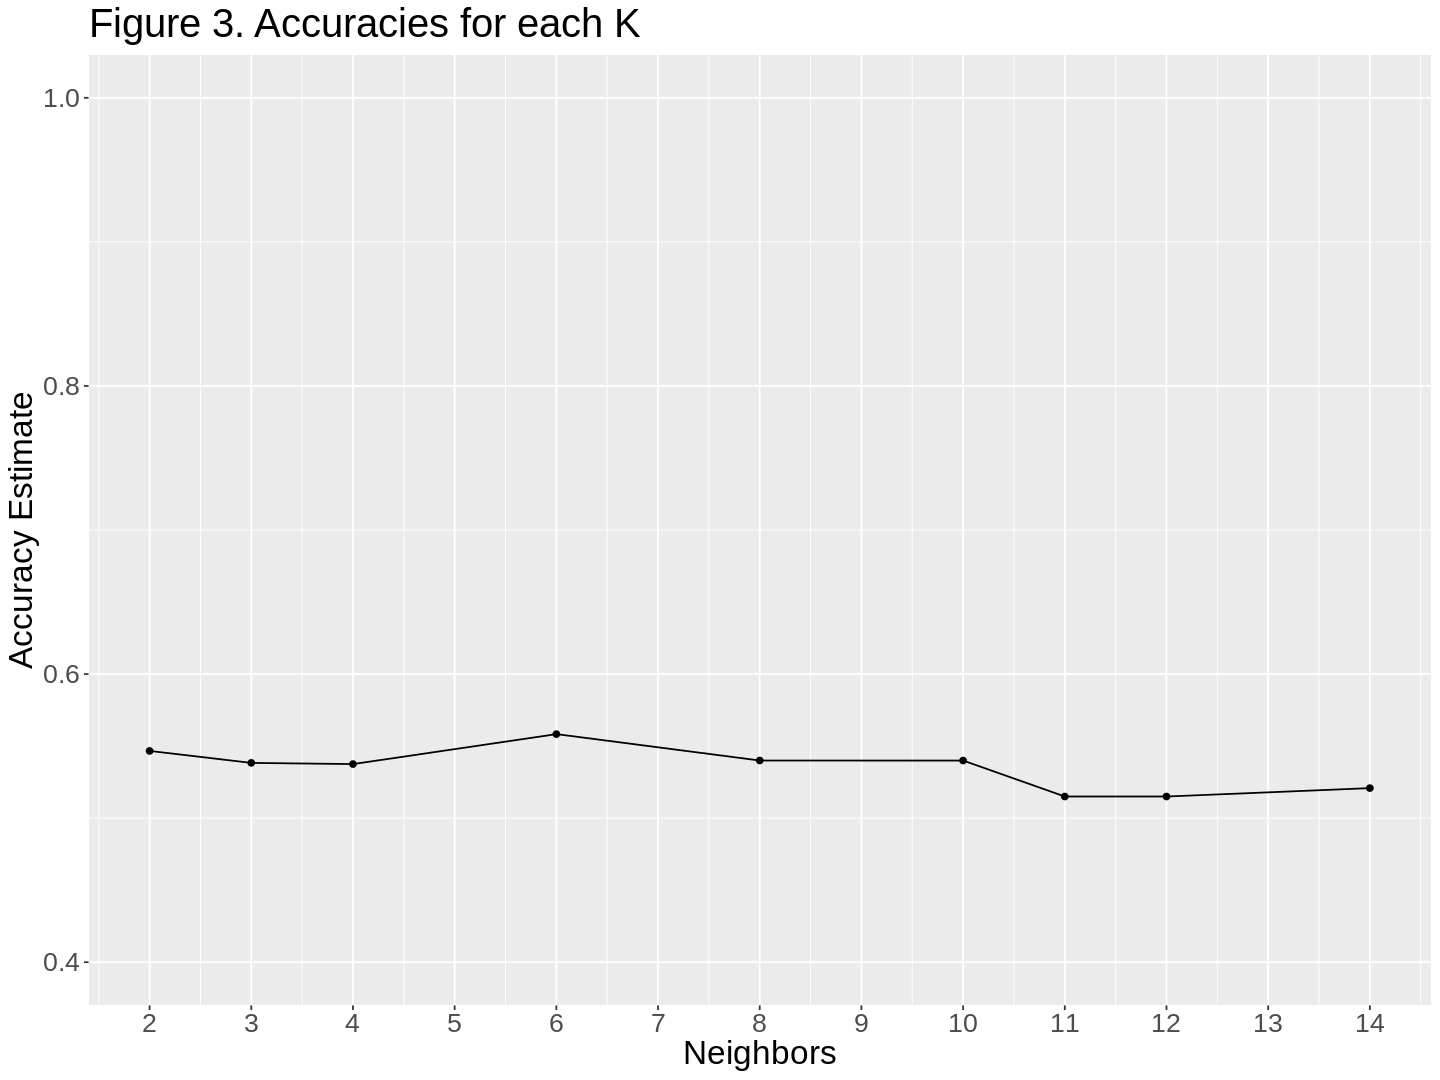

In [46]:
#view results
accuracies <- artworks_tune_results %>% 
      filter(.metric == 'accuracy')

#plot the different accuracies of K
accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate") +
      ggtitle('Figure 3. Accuracies for each K') +
      scale_x_continuous(breaks = seq(0, 14, by = 1)) +  # adjusting the x-axis
      scale_y_continuous(limits = c(0.4, 1.0)) + # adjusting the y-axis
      theme(text = element_text(size = 20))
accuracy_versus_k

Accuracy appears unaffected by values of K. The model has an accuracy of 55% (low) when using the training data set. The accuracy appears unaffected by the number of nearest neighbours which suggests that there is no correlation between artwork size and gender and our hypothesis can therefore be rejected from this result in terms of this particular dataset. However, from the plot, we can see that the highest accuracy for a given K is when K equals 6. Therefore for our final prediction, we use K=6.

### Final Prediction

In [42]:
set.seed(1234)

# artworks_best_spec
artworks_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 6) %>%
                      set_engine("kknn") %>%
                      set_mode("classification")

# artworks_best_fit
artworks_best_fit <- workflow() %>%
                     add_recipe(artwork_recipe) %>%
                     add_model(artworks_best_spec) %>%
                     fit(artworks_both)

# final prediction
artworks_predictions <- predict(artworks_best_fit, artworks_testing) %>%
                        bind_cols(artworks_testing)

artworks_new_metrics <- artworks_predictions %>%
                        metrics(truth = Gender, estimate = .pred_class)   
artworks_new_metrics

#create confusion matrix
artworks_conf_mat <- artworks_predictions %>%
                     conf_mat(truth = Gender, estimate = .pred_class)
artworks_conf_mat

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6956522
kap,binary,0.3906568


          Truth
Prediction (Female) (Male)
  (Female)       98     42
  (Male)         49    110

From our final prediction, we get an accuracy of ~70% when we use the best K of 6. The model made 208 correct predictions, misclassified Male artwork as Female artwork 42 times, and misclassified Female artwork as Male artwork 49 times. 

## Conclusion 

Our group had expected to find an accuracy rate that was higher than 70% for our predictor. However, an interesting note is that the model performed much better on the test data than the training data (about 15 percentage points), even though both are not particularly accurate. This may be because there is no significant difference in height and width of artworks between genders, leaving a lot of the predictions up to chance.

Additional questions that arise from this result are: 
1. Is there a pattern of artwork sizes by gender that change over time? 

For example, as socio-economic inequalties could be more present the further we go back in time.

2. Might the inclusion of additional predictors (ie, artwork Weight) have changed the results our analysis? 

Future explorations could using more complex parsing methods (outside the scope of this course) to interpret the metadata in the “Medium” column to better filter the descriptions of particular types of works that are better captured by rectangular height and width measurements (ie, the height and width measurement of a painting is more meaningful than the height and width of audio-based art installation for example). 

As mentioned above, the impact of this analysis could produce rich insights into the socio-economic inequalties present the world of art.